In [106]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html


How does the growth rate of invasive tribble fish in Lake Evolution, an isolated lake, affect the population of cute fish over time?

Lake Evolution has held a steady population of cute fish in equilibrium for as long as anyone can remember. However, with the recent spread of the invasive, quick reproducing tribble fish many locals are worried about how their introduction to Lake Evolution might affect the native population. Tribble fish have been shown to have a widely varying growth rate based on many factors. So, how would their growth rate affect the cute fish population if they were to be introduced to Evolution Lake? 

To explore this we will create a model of the tribble fish’s population growth based on set growth rate. Next, we will calculate the tribble fish’s consumption of Lake Evolution’s resources. Finally, we will model the cute fish’s population based on the resources left available to them.

We will run the model a series of times with varying tribble growth rates to show how the cute population will be affected based on how quickly the tribble reproduce.



In [107]:
Test = 0.05 #This will change throughout the for loop in run_simulation()
start = 0.05
system = System(cute_cap = 1375, tribble_cap = 11000, cute_birth_rate = 0.05)
lake_sim = State(tribble_pop=2, cute_pop = system.cute_cap, AR = 100, tribble_growth_rate = Test, cute_survival_rate = 0,
                 cute_death_rate=start, tribble_annual_growth = 0)

,values
tribble_pop,2.00
cute_pop,1375.00
AR,100.00
tribble_growth_rate,0.05
cute_survival_rate,0.00
cute_death_rate,0.05
tribble_annual_growth,0.00


Above is the variables and objects we established to set up the Evolution Lake.

In [108]:
def update_pops(lake_sim, change, system): #add tribble growth rate, which is called upon in the sweep series
    tribble_results = TimeSeries()
    tribble_results[0] = lake_sim.tribble_pop
    
    AR_results = TimeSeries()
    
    cute_results = TimeSeries()
    cute_results[0] = system.cute_cap
    
    for t in range(300):
        lake_sim.tribble_annual_growth = tribble_results[t]*change* (1- (tribble_results[t]/system.tribble_cap))
        tribble_results[t+1] = tribble_results[t] + lake_sim.tribble_annual_growth
        
        AR_results[t] = (1- (tribble_results[t]/system.tribble_cap)*0.125)*100 #available resources in the lake
        
        lake_sim.cute_death_rate =  0.05 + (1- AR_results[t]/100)* 0.95
        cute_results[t+1] = cute_results[t] + ((system.cute_birth_rate*cute_results[t]) - (lake_sim.cute_death_rate*cute_results[t]))
        
    #return tribble_results, cute_results
    plot(tribble_results)
    plot(cute_results, label = change)



In [109]:
def run_simulation():
    growth_array = linspace(0.01,0.1,10)
    for t in growth_array:
        update_pops(lake_sim, t, system)
    decorate(xlabel = 'Years',
             ylabel = 'Pop (in millions)')

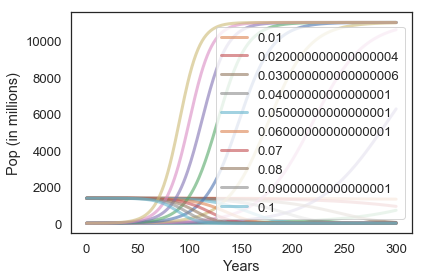

In [110]:
run_simulation()

Interpretation:
This figure shows the cute fish's population and the tribble fish's population based on the tribble fish's different growth rates.
You can see that the larger the growth rate, the faster the cute fish's population declines.

Overall, this model seems to predict what may happen in a real lake well. Some improvements that could be made are adding in more factors so that the populations aren't just based on the available resources.